In [47]:
### 🔧 TAREA
# Compara el desempeño de la red neuronal con la regresión logística. Analiza sus métricas, curva ROC y precisión vs. recall.

In [48]:
import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [49]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

In [50]:
# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [51]:
# 🧪 Entrenar modelo base (Regresión Logística)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# 🔍 Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

In [52]:
# 📥 Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("../models/nn_model.keras")

# 🔍 Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.5)

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


In [53]:
# 📊 Evaluación individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresión Logística")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4000
           1       0.76      0.65      0.70      4004

    accuracy                           0.72      8004
   macro avg       0.73      0.72      0.72      8004
weighted avg       0.73      0.72      0.72      8004

F1 Score     : 0.7009
Precision    : 0.7586
Recall       : 0.6513
ROC AUC      : 0.7968

📊 Evaluación del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      4000
           1       0.80      0.67      0.73      4004

    accuracy                           0.75      8004
   macro avg       0.76      0.75      0.75      8004
weighted avg       0.76      0.75      0.75      8004

F1 Score     : 0.7328
Precision    : 0.8034
Recall       : 0.6736
ROC AUC      : 0.8310


{'f1': 0.7327808721641081,
 'precision': 0.803395889186774,
 'recall': 0.6735764235764236,
 'roc_auc': 0.8309521728271729}

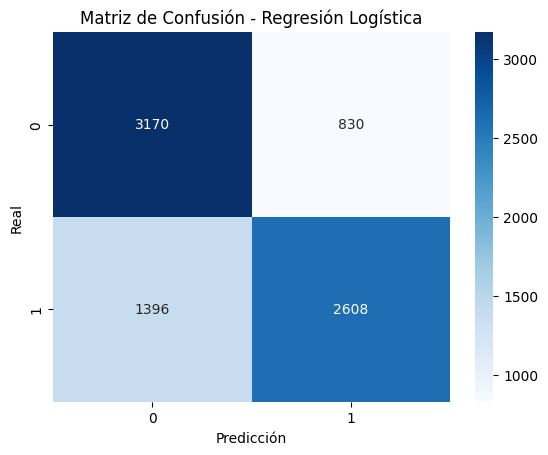

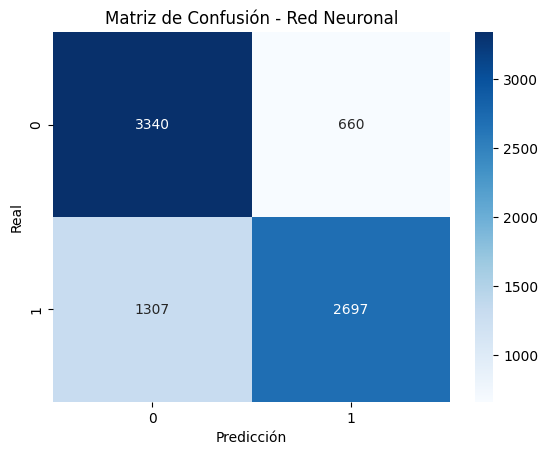

In [54]:
# 🧱 Matrices de Confusión
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

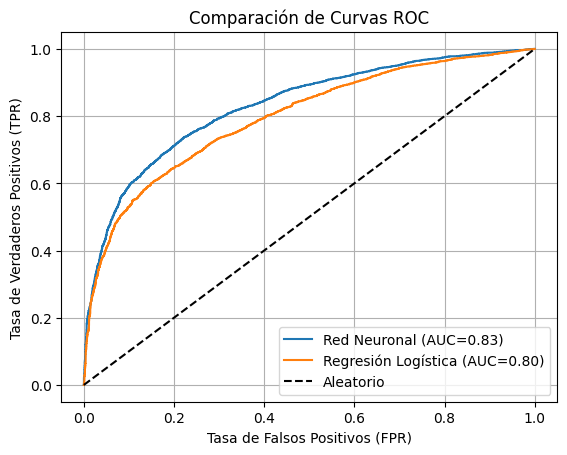

In [55]:
# 📈 Comparación de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresión Logística")

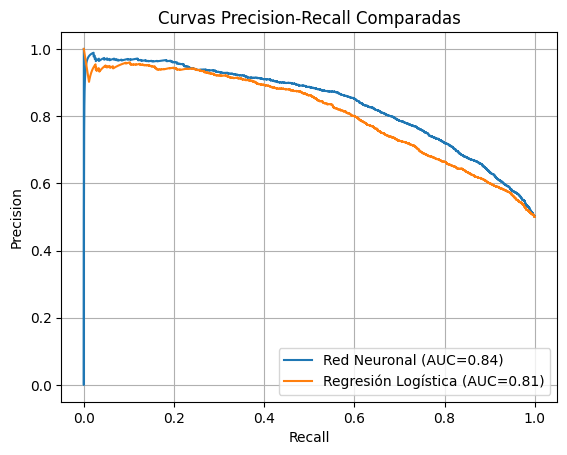

In [56]:
# 🔍 Comparación de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresión Logística")

In [57]:
# 📋 Comparación de métricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(df_metrics)

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.803396,0.673576,0.732781,0.830952
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


# Respuestas de la tarea

## A. Compara el desempeño de la red neuronal con la regresión logística

### A1. Analiza sus métricas

>Precisión

Red Neuronal: 0.803

Regresión Logística: 0.759

Esto indica que la red neuronal es un poco más precisa al predecir que un cliente entrará en default. Es decir, de todos los que predice como futuros morosos, una mayor cantidad así lo son realmente. Si el foco del banco es minimizar el rechazo de un crédito a quien sí pagaría, la red neuronal es un poco más confiable que el modelo de regresión logística.

> Recall (sensibilidad)

Red Neuronal: 0.674

Regresión Logística: 0.651

El recall nos dice cuántos futuros default logra detectar el modelo. El modelo de red neuronal identifica mejor los futuros morosos. Si por el contrario, el foco del banco es detectar riesgos en otorgamientos de créditos a las personas incorrectas financieramente, la red neuronal mejora esta necesidad. Aumentar el recall reduce el número de falsos negativos (aprobar crédito a quien no pagará).

>F1-Score

Red Neuronal: 0.733

Regresión Logística: 0.701

Este valor balancea precisión y recall. Un F1-score más alto indica mejor equilibrio entre identificar correctamente morosos y no penalizar a los buenos clientes.

>AUC - Área bajo la curva ROC

Red Neuronal: 0.831

Regresión Logística: 0.797

El AUC mide la capacidad del modelo para distinguir entre clases. Cuanto más alto, mejor. Ambos modelos son razonablemente buenos, pero la red neuronal discrimina mejor entre clientes que entrarán default y los que no.


### A2. Análisis de la Curva ROC

La Red Neuronal posee un AUC de 0.83, lo cual sugiere que tiene una mejor capacidad de discriminar entre clientes buenos y malos (default vs. no default).

La Regresión Logística posee un AUC de 0.80, lo cual indica que también es un buen modelo pero su poder de discriminación es menor en comparación comn el modelo de red neuronal.

Las curvas no son tan diferentes entre sí, ambos modelos capturan patrones similares, pero la red neuronal lo hace con mayor eficacia ya que su curva está mas alejada de la diagonal punteada.

### A3. Precisión vs. recall

Ambas curvas decrecen a medida que el recall aumenta, lo cual es esperable cuando el modelo trata de capturar más positivos, también aumenta el riesgo de incluir falsos positivos, por lo que la precisión baja.

La red neuronal tiene una mayor precisión en todos los niveles del Recall en comparación con la regresión logística. De igual forma, El comportamiento del Recall en la red neuronal es superior que en el modelo de regresión logística. En este contexto, la red neuronal ofrece mejores resultados que la regresión logística, ya que tiene mayor potencial de identificar personas o clientes que caerán en default. Lo cual, es el riesgo que le conviene minimizar al banco.

Quizás sea útil sacrificar un poco más la precisión para aumentar el Recall en este modelo.

## B. ¿En qué umbral se maximiza el F1-score para cada modelo? ¿Te parece razonable utilizar 0.5 como punto de corte en este contexto?

In [59]:
# Crear rangos de umbrales posibles entre 0 y 1
thresholds = np.linspace(0.01, 0.99, 100)

# Calcular F1-score para cada umbral en ambos modelos
f1_scores_nn = [f1_score(y_test, y_proba_nn >= t) for t in thresholds]
f1_scores_log = [f1_score(y_test, y_proba_log >= t) for t in thresholds]

# Obtener umbral óptimo para cada modelo
best_threshold_nn = thresholds[np.argmax(f1_scores_nn)]
best_f1_nn = np.max(f1_scores_nn)

best_threshold_log = thresholds[np.argmax(f1_scores_log)]
best_f1_log = np.max(f1_scores_log)

# Mostrar resultados correctamente
print(f"Red Neuronal - Mejor F1: {best_f1_nn:.3f} con umbral: {best_threshold_nn:.2f}")
print(f"Regresión Logística - Mejor F1: {best_f1_log:.3f} con umbral: {best_threshold_log:.2f}")

Red Neuronal - Mejor F1: 0.759 con umbral: 0.36
Regresión Logística - Mejor F1: 0.726 con umbral: 0.39


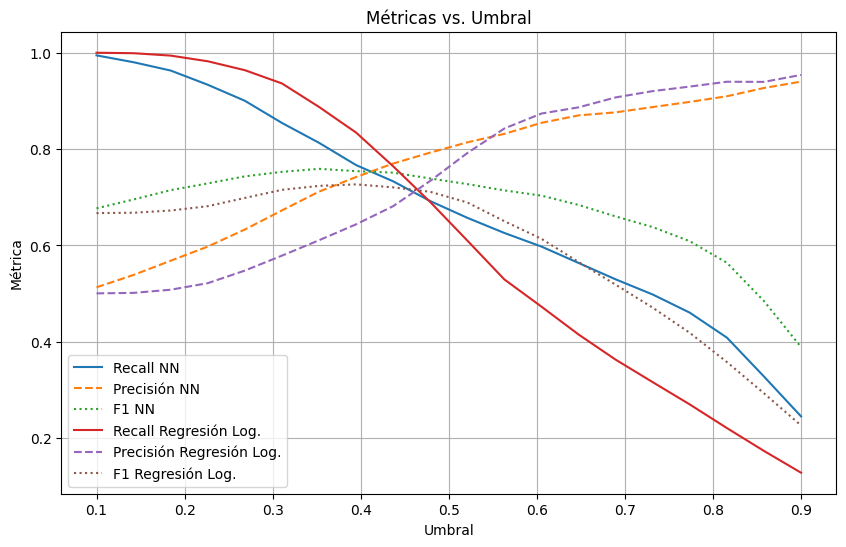

In [66]:
def leer_txt(path):
    """
    Carga un archivo de texto y lo devuelve como una lista de líneas.
    """
    with open(path, 'r',encoding='utf-8') as file:
        return file.read()
    
umbral = leer_txt("C:/Users/homel/OneDrive - Universidad San Sebastian/Escritorio/DeepNeuralNetworkUSS/Projects/Credit/Umbral.txt")

exec(umbral)
plt.show()

El umbral definido en el modelo es 0.5. Sin embargo, vemos que el umbral optimo de F1-score 0.759 es 0.36 para la red neuronal, y  para el F1-score 0.726 de la regresión logística es 0.39.

En este contexto, no necesariamente 0.5 es el corte ideal. Podríamos sacrificar un poco de Precisión para aumentar el recall, disminuyendo el umbral a 0.40. Con esto podríamos elevar el Recall a 0.75 aprox y bajar la precisión a 0.74 apróx. Lo cual no es mal negocio para aumentar la capacidad del modelo en el contexto de este análisis.

## C. ¿Es uno de los modelos más conservador o arriesgado que el otro?

Ambos modelos tienen rendimientos similares, pero el modelo de regresión logística, al tener menos recall que la red neuronal, es un poco menos robusto para limitar el riesgo que existe al darle créditos a personas que entrarán de default.